<a href="https://colab.research.google.com/github/ismael-rtellez/Iris_Binary_Classification/blob/main/Binary_Classification_of_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem 1: Select features and categories for practice

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

iris_data = load_iris()

X = pd.DataFrame(iris_data.data, columns=["sepal_length","sepal_width","petal_length","petal_width"])
y = pd.DataFrame(iris_data.target, columns=["Species"])

df = pd.concat([X, y], axis=1)
df

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [2]:
# Extract sepal_length and petal_length with target that is greater than 0
df_V2 = df[['sepal_length','petal_length','Species']][df['Species']!=0]
df_V2

,sepal_length,petal_length,Species
50,7.0,4.7,1
51,6.4,4.5,1
52,6.9,4.9,1
53,5.5,4.0,1
54,6.5,4.6,1
...,...,...,...
145,6.7,5.2,2
146,6.3,5.0,2
147,6.5,5.2,2
148,6.2,5.4,2


## Problem 2: Data Analysis

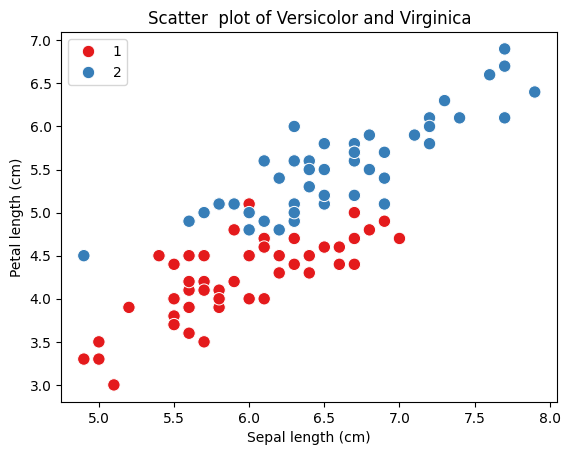

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create scatter plot
sns.scatterplot(x='sepal_length', y='petal_length', hue='Species', data=df_V2, palette='Set1',s=80)
plt.title('Scatter  plot of Versicolor and Virginica')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Petal length (cm)')
plt.legend()
plt.show()

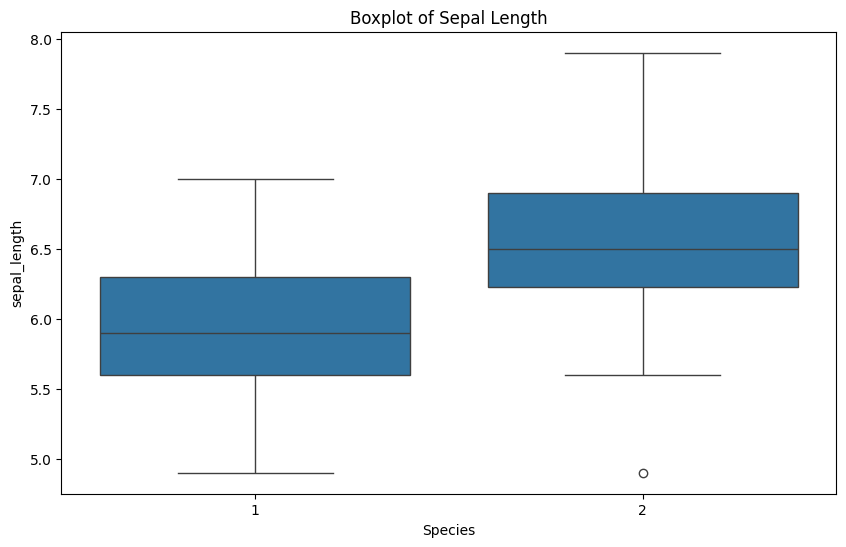

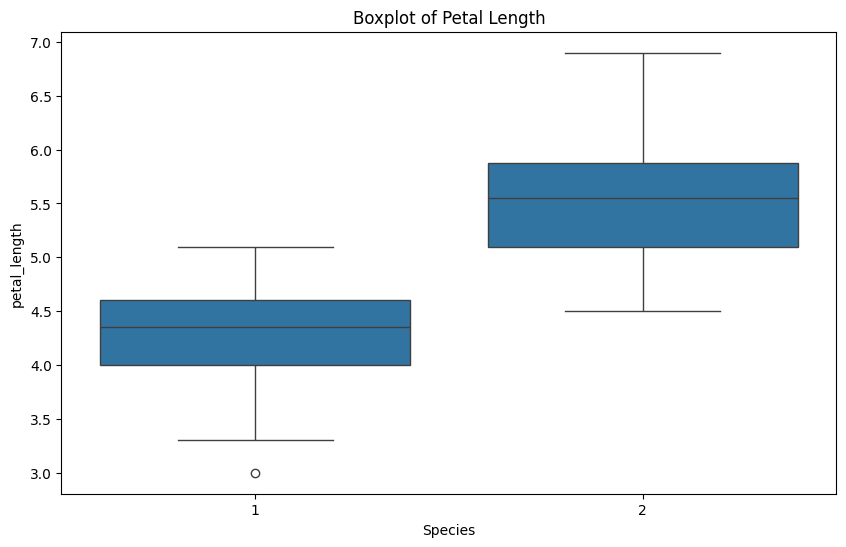

In [4]:
# Box plots
# boxplot for sepal length
plt.figure(figsize=(10,6))
sns.boxplot(data=df_V2, x='Species', y='sepal_length')
plt.title('Boxplot of Sepal Length')
plt.show()

# boxplot for petal length
plt.figure(figsize=(10,6))
sns.boxplot(data=df_V2, x='Species', y='petal_length')
plt.title('Boxplot of Petal Length')
plt.show()

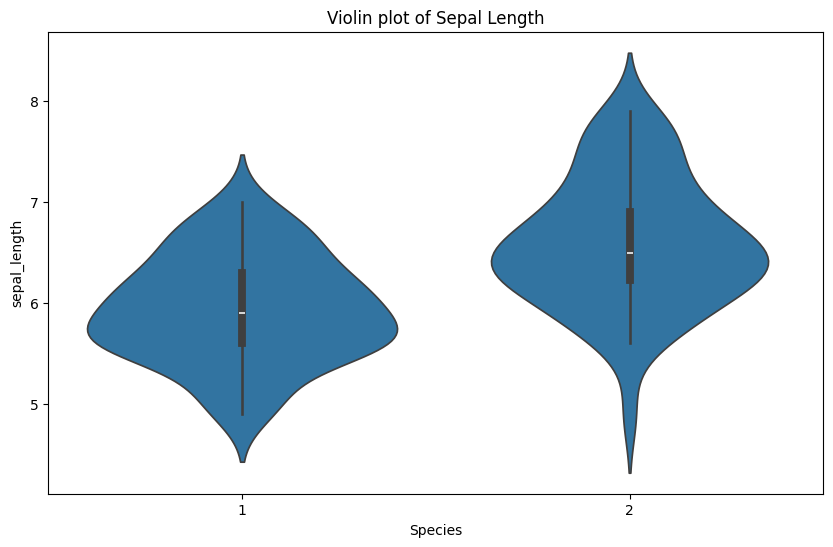

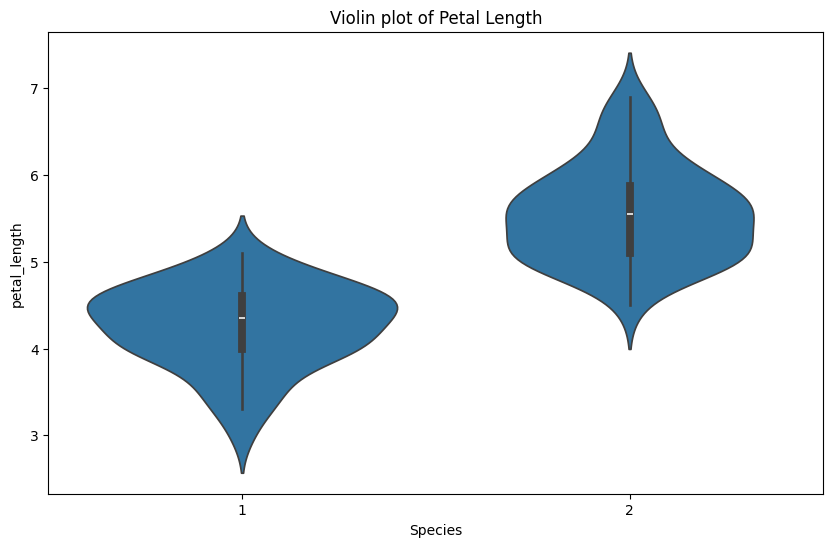

In [5]:
# Violin plots
# violin plot for sepal length
plt.figure(figsize=(10,6))
sns.violinplot(data=df_V2, x='Species', y='sepal_length')
#sns.swarmplot(data=df_V2, x='Species', y='sepal_length', color='k', size=4)
plt.title('Violin plot of Sepal Length')
plt.show()

# violin plot for petal length
plt.figure(figsize=(10,6))
sns.violinplot(data=df_V2, x='Species', y='petal_length')
plt.title('Violin plot of Petal Length')
plt.show()

## Problem 3: Division of preprocessing/trainig data and verification data

In [6]:
from sklearn.model_selection import train_test_split

subset = df.loc[(df['Species']==1)|(df['Species']==2)].reset_index(drop=True)

X = np.array(subset.loc[:,["sepal_length", "petal_length"]])
y = np.array(subset["Species"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(75, 2) (25, 2) (75,) (25,)


## Problem 4: Pretreatment/Standardization

In [7]:
from sklearn.preprocessing import StandardScaler

# Create scaler
scaler = StandardScaler()

# Fit data train
scaler.fit(X_train)

# Transform
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled
X_test_scaled

array([[ 0.02958286,  0.17465819],
       [ 0.02958286,  0.77008384],
       [ 0.91706879,  0.88916897],
       [-0.85790306, -0.89710798],
       [-1.00581738, -0.89710798],
       [-1.15373171, -1.13527824],
       [ 0.02958286, -0.06351207],
       [ 1.6566404 ,  1.36550949],
       [-1.89330331, -1.73070389],
       [ 1.06498311, -0.30168233],
       [-0.11833146, -0.53985259],
       [-1.15373171, -1.3734485 ],
       [ 0.02958286, -0.06351207],
       [-0.4141601 ,  0.17465819],
       [ 0.62124015,  0.77008384],
       [ 0.32541151, -0.42076746],
       [-0.11833146, -0.1825972 ],
       [-0.26624578, -0.06351207],
       [-0.4141601 , -1.13527824],
       [-1.15373171, -1.49253363],
       [ 1.95246904,  1.96093514],
       [-0.4141601 , -0.1825972 ],
       [ 0.76915447, -0.1825972 ],
       [-0.70998874, -1.13527824],
       [-0.4141601 ,  0.05557306]])

## Problem 5: Learning and estimation

In [8]:
from sklearn.neighbors import KNeighborsClassifier
# for the case of 5 nn
# Create KNN con k=5
knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_train_scaled, y_train)
# Predict
y_pred_knn5 = knn5.predict(X_test_scaled)

result_knn5 = pd.DataFrame([y_pred_knn5, y_test, (y_pred_knn5==y_test)], index=['Prediction', 'Actual Value', 'Correct'])
result_knn5

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
Prediction,2,2,2,1,1,1,1,2,1,1,...,1,1,1,1,1,2,1,1,1,2
Actual Value,2,2,2,1,1,1,1,2,1,1,...,1,2,2,1,1,2,2,1,1,2
Correct,True,True,True,True,True,True,True,True,True,True,...,True,False,False,True,True,True,False,True,True,True


In [9]:
# for the case of 3 nn
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_train_scaled, y_train)
# Predict
y_pred_knn3 = knn3.predict(X_test_scaled)

result_knn3 = pd.DataFrame([y_pred_knn5, y_test, (y_pred_knn5==y_test)], index=['Prediction', 'Actual Value', 'Correct'])
result_knn3

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
Prediction,2,2,2,1,1,1,1,2,1,1,...,1,1,1,1,1,2,1,1,1,2
Actual Value,2,2,2,1,1,1,1,2,1,1,...,1,2,2,1,1,2,2,1,1,2
Correct,True,True,True,True,True,True,True,True,True,True,...,True,False,False,True,True,True,False,True,True,True


In [10]:
# for the case of 1 nn
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train_scaled, y_train)
# Predict
y_pred_knn1 = knn1.predict(X_test_scaled)

result_knn1 = pd.DataFrame([y_pred_knn5, y_test, (y_pred_knn5==y_test)], index=['Prediction', 'Actual Value', 'Correct'])
result_knn1

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
Prediction,2,2,2,1,1,1,1,2,1,1,...,1,1,1,1,1,2,1,1,1,2
Actual Value,2,2,2,1,1,1,1,2,1,1,...,1,2,2,1,1,2,2,1,1,2
Correct,True,True,True,True,True,True,True,True,True,True,...,True,False,False,True,True,True,False,True,True,True


## Problem 6: Evaluation

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Accuracy for knn 5, 3, 1
accuracy_knn5 = accuracy_score(y_test, y_pred_knn5)
accuracy_knn3 = accuracy_score(y_test, y_pred_knn3)
accuracy_knn1 = accuracy_score(y_test, y_pred_knn1)
print("Accuracy classification score for KNN if n = 5, 3, 1:")
print("For nn5:", accuracy_knn5)
print("For nn3:", accuracy_knn3)
print("For nn1:", accuracy_knn1)
print("")

# Precision
precision_knn5 = precision_score(y_test, y_pred_knn5)
precision_knn3 = precision_score(y_test, y_pred_knn3)
precision_knn1 = precision_score(y_test, y_pred_knn1)
print("Precision score for KNN if n = 5, 3, 1:")
print("For nn5:", precision_knn5)
print("For nn3:", precision_knn3)
print("For nn1:", precision_knn1)
print("")

# recall
recall_knn5 = recall_score(y_test, y_pred_knn5)
recall_knn3 = recall_score(y_test, y_pred_knn3)
recall_knn1 = recall_score(y_test, y_pred_knn1)
print("Recall score for KNN if n = 5, 3, 1:")
print("For nn5:", recall_knn5)
print("For nn3:", recall_knn3)
print("For nn1:", recall_knn1)
print("")

# f1 score
f1_knn5 = f1_score(y_test, y_pred_knn5)
f1_knn3 = f1_score(y_test, y_pred_knn3)
f1_knn1 = f1_score(y_test, y_pred_knn1)
print("F1 score for KNN if n = 5, 3, 1:")
print("For nn5:", f1_knn5)
print("For nn3:", f1_knn3)
print("For nn1:", f1_knn1)

# confusion matrix
cm_knn5 = confusion_matrix(y_test, y_pred_knn5)
cm_knn3 = confusion_matrix(y_test, y_pred_knn3)
cm_knn1 = confusion_matrix(y_test, y_pred_knn1)
print("Confusion matrix to evaluate the accuracy of classification score for predict knn5, knn3, knn1:")
print("For nn5:\n", cm_knn5)
print("For nn3:\n", cm_knn3)
print("For nn1:\n", cm_knn1)

Accuracy classification score for KNN if n = 5, 3, 1:
For nn5: 0.8
For nn3: 0.8
For nn1: 0.8

Precision score for KNN if n = 5, 3, 1:
For nn5: 0.7647058823529411
For nn3: 0.8
For nn1: 0.8

Recall score for KNN if n = 5, 3, 1:
For nn5: 0.9285714285714286
For nn3: 0.8571428571428571
For nn1: 0.8571428571428571

F1 score for KNN if n = 5, 3, 1:
For nn5: 0.8387096774193549
For nn3: 0.8275862068965517
For nn1: 0.8275862068965517
Confusion matrix to evaluate the accuracy of classification score for predict knn5, knn3, knn1:
For nn5:
 [[13  1]
 [ 4  7]]
For nn3:
 [[12  2]
 [ 3  8]]
For nn1:
 [[12  2]
 [ 3  8]]


### The meaning of the four types of index values:


---

**Accuracy_score:** Represent how much predict values is exactly the same as the actual value. For example, we got 21/25 correct value from the above table, which equals to 0.84 of all test samples.  
**precision_score:** Is the ratio ```tp / (tp + fp)``` where ```tp``` is the number of true positives and ```fp``` is the number of false positives. The precision is intuitively the ability of the classifier no to label as positive a sample that tha is negative. Best value 1, worst value 0.   
**recall_score:** is the ratio ```tp / (tp + fn)``` where ```tp``` is the number of true positives and ```fn``` is the number of false negatives. The recall is intuitively the ability of the classifier to find all the positives samples. Best value 1, worst value 0.   
**f1_score:** The F1 score can be interpreted as a harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. the realtive contribution of precision and recall to the F1 score are equal.    
The formula is: ```F1 = 2 * (precision * recall)/(precision + recall)```


## Problem 7: visualization

In [29]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches


def decision_region(
    X,
    y,
    model,
    step=0.01,
    title="decision region",
    xlabel="xlabel",
    ylabel="ylabel",
    target_names=["versicolor", "virginica"],
):
    """"
    Draws the decision region of a model in which the binary classification is trained with two-dimensional features.
    The background colors are drawn from the estimates made by the learned model.
    The points in the scatter plot are training or validation data.
    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
      feature value
    y : ndarray, shape(n_samples,)
      Labels.
    model : object
      Insert the learned model instantly.
    step : float, (default : 0.1)
      Set the interval over which the estimates are computed.
    title : str
      Give the text of the plot title.
    xlabel, ylabel : str
      Give the text of the axis label.
    target_names= : list of str
      Give a list of legends.
    """
    # setting
    scatter_color = ["red", "blue"]
    contourf_color = ["pink", "skyblue"]
    n_class = 2
    # pred
    mesh_f0, mesh_f1 = np.meshgrid(
        np.arange(np.min(X[:, 0]) - 0.5, np.max(X[:, 0]) + 0.5, step),
        np.arange(np.min(X[:, 1]) - 0.5, np.max(X[:, 1]) + 0.5, step),
    )
    mesh = np.c_[np.ravel(mesh_f0), np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(
        mesh_f0, mesh_f1, y_pred, n_class - 1, cmap=ListedColormap(contourf_color)
    )
    plt.contour(
        mesh_f0, mesh_f1, y_pred, n_class - 1, colors="y", linewidths=3, alpha=0.5
    )
    for i, target in enumerate(np.unique(y)):
        plt.scatter(
            X[y == target][:, 0],
            X[y == target][:, 1],
            s=80,
            color=scatter_color[i],
            label=target_names[i],
            marker="o",
        )
    patches = [
        mpatches.Patch(color=scatter_color[i], label=target_names[i])
        for i in range(n_class)
    ]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

Decision boundary for 1 neighbors: 



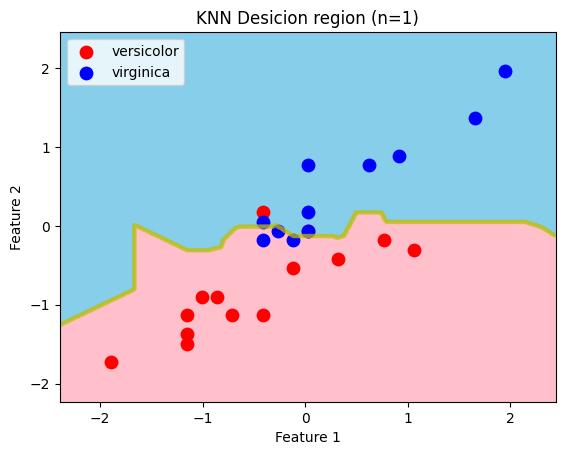

In [31]:
print("Decision boundary for 1 neighbors: \n")
decision_region(X_test_scaled, y_test, knn1, title="KNN Desicion region (n=1)", xlabel="Feature 1", ylabel="Feature 2")

Decision boundary for 3 neighbors: 



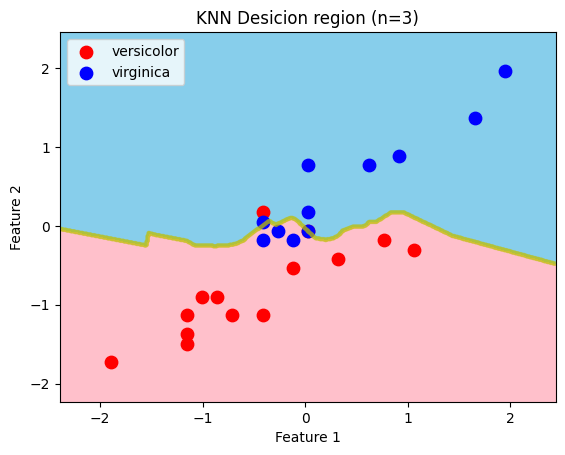

In [32]:
print("Decision boundary for 3 neighbors: \n")
decision_region(X_test_scaled, y_test, knn3, title="KNN Desicion region (n=3)", xlabel="Feature 1", ylabel="Feature 2")

Decision boundary for 5 neighbors: 



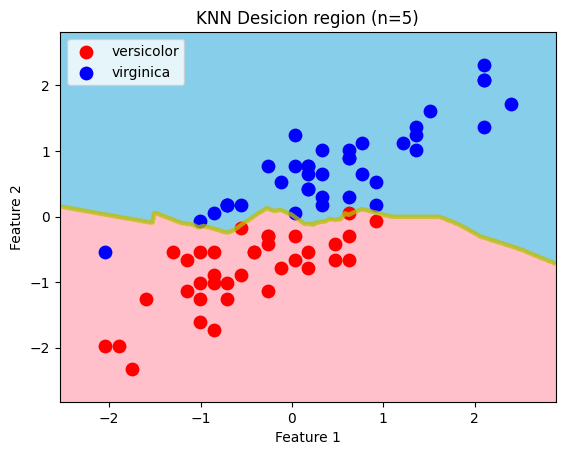

In [35]:
print("Decision boundary for 5 neighbors: \n")
decision_region(X_train_scaled, y_train, knn5, title="KNN Desicion region (n=5)", xlabel="Feature 1", ylabel="Feature 2")

## Problem 8: Learning by others methods

In [111]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def evaluation(y_true, y_pred, name_model="Model"):
    """
    Calcula y muestra Accuracy, Precision, Recall, F1 Score y la matriz de confusión.

    y_true: Real values
    y_pred: predict values
    name_model: title for the graphs
    """
    # Calculate
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)

    # Show results
    print(f"\nEvaluation of the {name_model}:")
    print(f"Accuracy:  {accuracy:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall:    {recall:.3f}")
    print(f"F1 Score:  {f1:.3f}")
    print("Confusion matrix:\n", cm)

-**Using Logistic Regression:**

In [108]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)
result_log = pd.DataFrame([y_pred_log, y_test, (y_pred_log==y_test)], index=['Prediction', 'Actual Value', 'Correct'])
result_log

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
Prediction,2,2,2,1,1,1,2,2,1,1,...,1,1,2,1,1,2,1,1,1,2
Actual Value,2,2,2,1,1,1,1,2,1,1,...,1,2,2,1,1,2,2,1,1,2
Correct,True,True,True,True,True,True,False,True,True,True,...,True,False,True,True,True,True,False,True,True,True


In [112]:
evaluation(y_test, y_pred_log, name_model="Logistoc Regression")


Evaluation of the Logistoc Regression:
Accuracy:  0.840
Precision: 0.857
Recall:    0.857
F1 Score:  0.857
Confusion matrix:
 [[12  2]
 [ 2  9]]


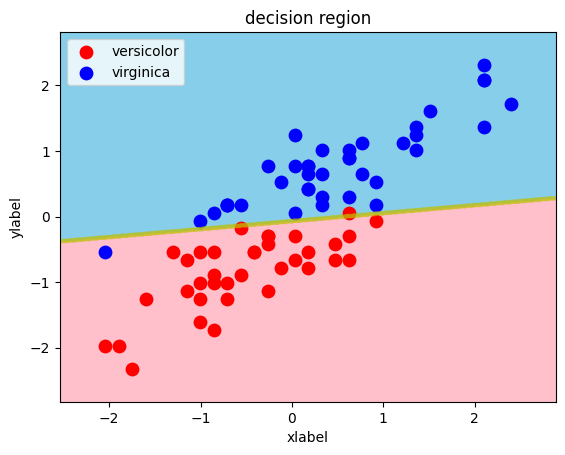

In [49]:
decision_region(X_train_scaled, y_train, log_reg, title="Logistic Regression")

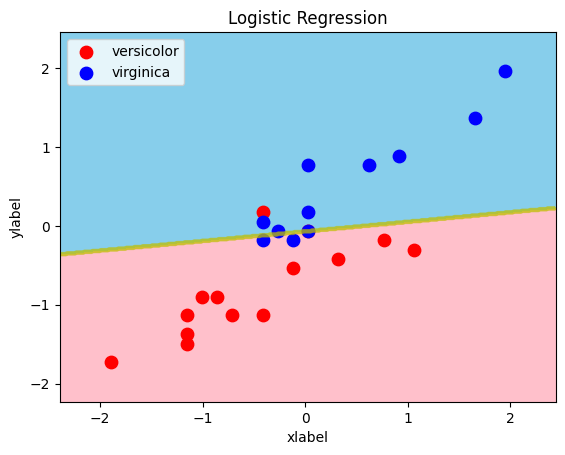

In [50]:
decision_region(X_test_scaled, y_test, log_reg, title="Logistic Regression")

-**SVM**

In [57]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

svm = make_pipeline(StandardScaler(), SVC(gamma="auto"))
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)
result_svm = pd.DataFrame([y_pred_svm, y_test, (y_pred_svm==y_test)], index=['Prediction', 'Actual Value', 'Correct'])
result_svm

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
Prediction,2,2,2,1,1,1,2,2,1,1,...,1,1,2,1,1,2,1,1,1,2
Actual Value,2,2,2,1,1,1,1,2,1,1,...,1,2,2,1,1,2,2,1,1,2
Correct,True,True,True,True,True,True,False,True,True,True,...,True,False,True,True,True,True,False,True,True,True


In [58]:
evaluation(y_test, y_pred_svm, name_model="Support Vector Machine")


Evaluation of the Support Vector Machine:
Accuracy:  0.840
Precision: 0.857
Recall:    0.857
F1 Score:  0.857
Confusion matrix:
 [[12  2]
 [ 2  9]]


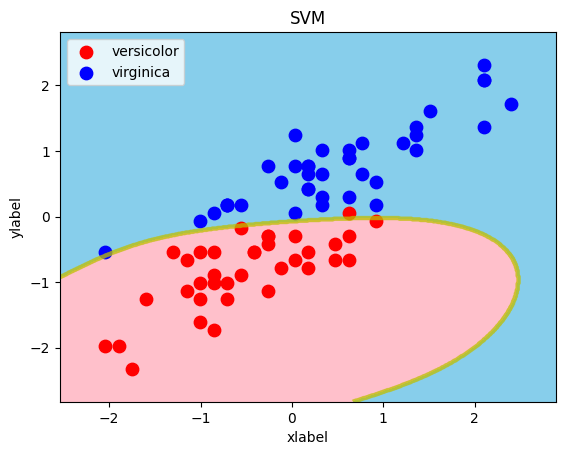

In [59]:
decision_region(X_train_scaled, y_train, svm, title="SVM")

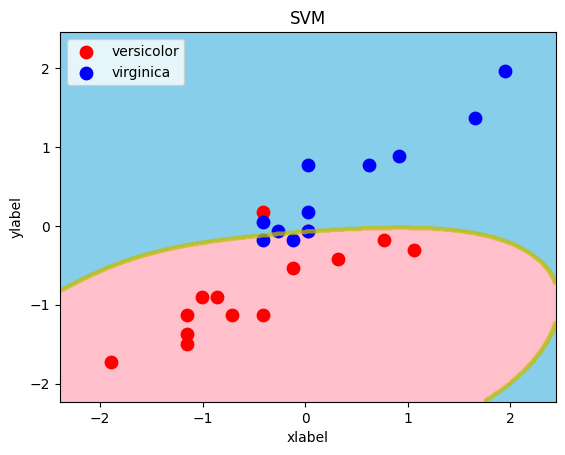

In [60]:
decision_region(X_test_scaled, y_test, svm, title="SVM")

-**Decision Tree**

In [62]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_scaled, y_train)
y_pred_tree = decision_tree.predict(X_test_scaled)
result_tree = pd.DataFrame([y_pred_tree, y_test, (y_pred_tree==y_test)], index=['Prediction', 'Actual Value', 'Correct'])
result_tree

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
Prediction,2,2,2,1,1,1,1,2,1,1,...,1,1,2,1,1,2,1,1,1,2
Actual Value,2,2,2,1,1,1,1,2,1,1,...,1,2,2,1,1,2,2,1,1,2
Correct,True,True,True,True,True,True,True,True,True,True,...,True,False,True,True,True,True,False,True,True,True


In [63]:
evaluation(y_test, y_pred_tree, name_model="Decision Tree")


Evaluation of the Decision Tree:
Accuracy:  0.840
Precision: 0.812
Recall:    0.929
F1 Score:  0.867
Confusion matrix:
 [[13  1]
 [ 3  8]]


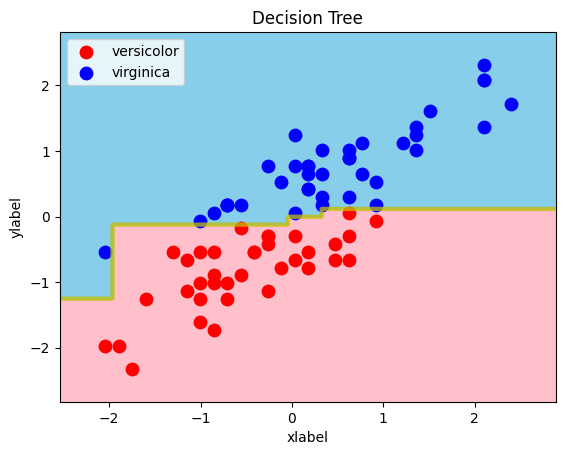

In [64]:
decision_region(X_train_scaled, y_train, decision_tree, title="Decision Tree")

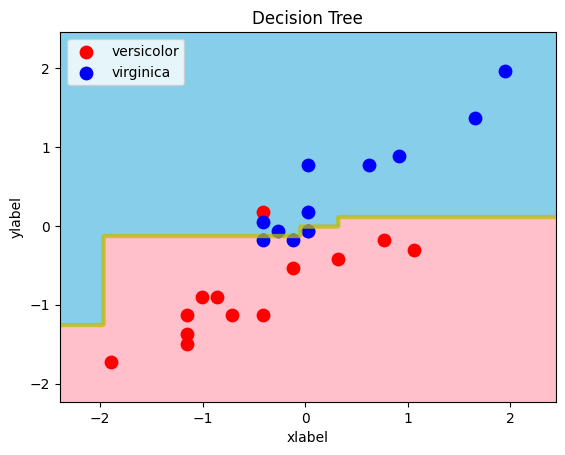

In [65]:
decision_region(X_test_scaled, y_test, decision_tree, title="Decision Tree")

-**Random Fotrest**

In [99]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()
random_forest.fit(X_train_scaled, y_train)
y_pred_rforest = random_forest.predict(X_test_scaled)
result_rforest = pd.DataFrame([y_pred_rforest, y_test, (y_pred_rforest==y_test)], index=['Prediction', 'Actual Value', 'Correct'])
result_rforest

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
Prediction,2,2,2,1,1,1,2,2,1,1,...,1,1,2,1,1,2,1,1,1,2
Actual Value,2,2,2,1,1,1,1,2,1,1,...,1,2,2,1,1,2,2,1,1,2
Correct,True,True,True,True,True,True,False,True,True,True,...,True,False,True,True,True,True,False,True,True,True


In [100]:
evaluation(y_test, y_pred_rforest, name_model="Random Forest")


Evaluation of the Random Forest:
Accuracy:  0.840
Precision: 0.857
Recall:    0.857
F1 Score:  0.857
Confusion matrix:
 [[12  2]
 [ 2  9]]


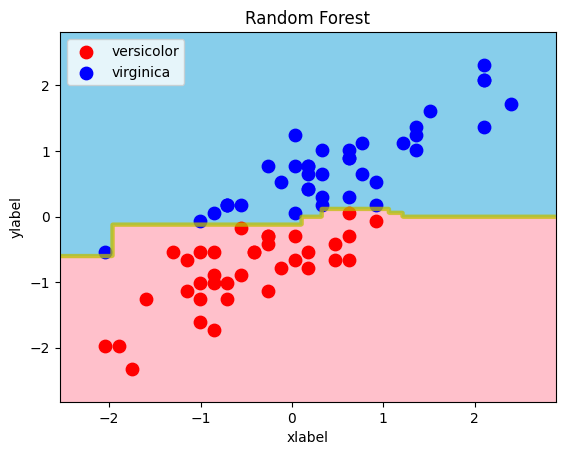

In [101]:
decision_region(X_train_scaled, y_train, random_forest, title="Random Forest")

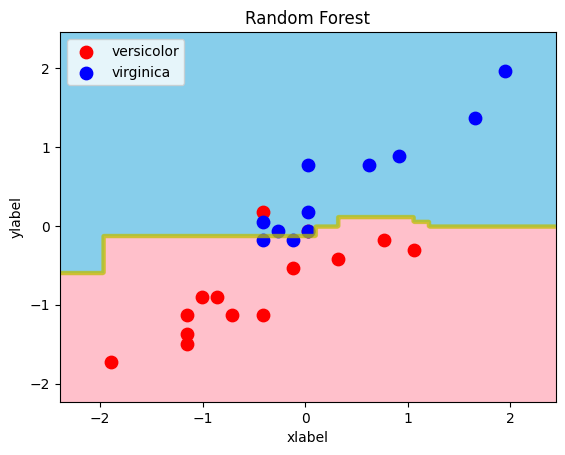

In [102]:
decision_region(X_test_scaled, y_test, random_forest, title="Random Forest")

## Problem 9: (Advanced Task) Comparison with and without standardization

In [113]:
knn3_unscaled = KNeighborsClassifier(n_neighbors=3)
knn3_unscaled.fit(X_train, y_train.ravel())
y_pred_knn3_unscaled = knn3_unscaled.predict(X_test)

evaluation(y_test, y_pred_knn3_unscaled)


Evaluation of the Model:
Accuracy:  0.800
Precision: 0.800
Recall:    0.857
F1 Score:  0.828
Confusion matrix:
 [[12  2]
 [ 3  8]]


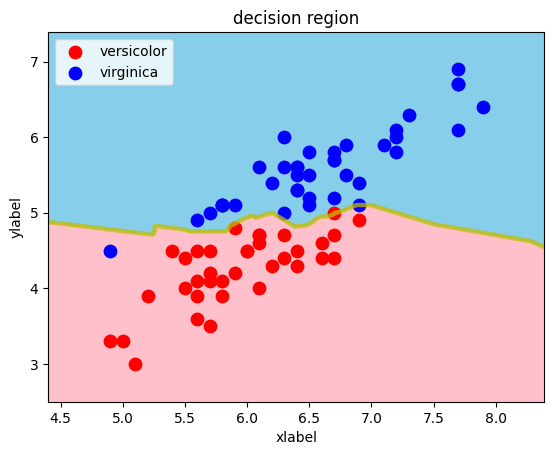

In [104]:
decision_region(X_train, y_train, knn3_unscaled)

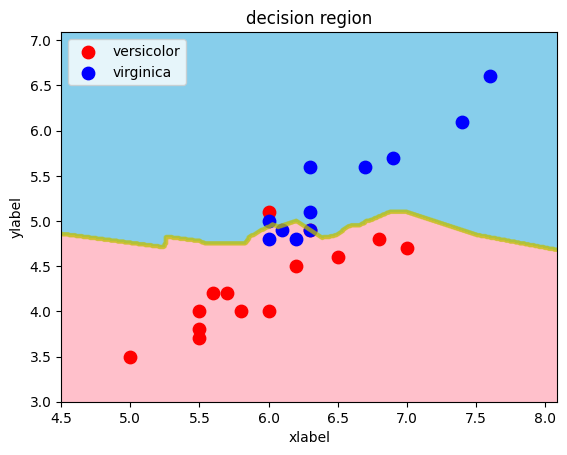

In [105]:
decision_region(X_test, y_test, knn3_unscaled)

In [114]:
log_reg_unscaled = LogisticRegression()
log_reg_unscaled.fit(X_train, y_train)
y_pred_log_unscaled = log_reg_unscaled.predict(X_test)
evaluation(y_test, y_pred_log_unscaled)


Evaluation of the Model:
Accuracy:  0.840
Precision: 0.857
Recall:    0.857
F1 Score:  0.857
Confusion matrix:
 [[12  2]
 [ 2  9]]


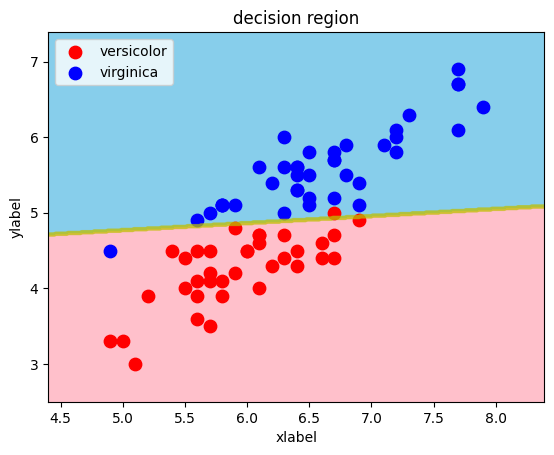

In [115]:
decision_region(X_train, y_train, log_reg_unscaled)

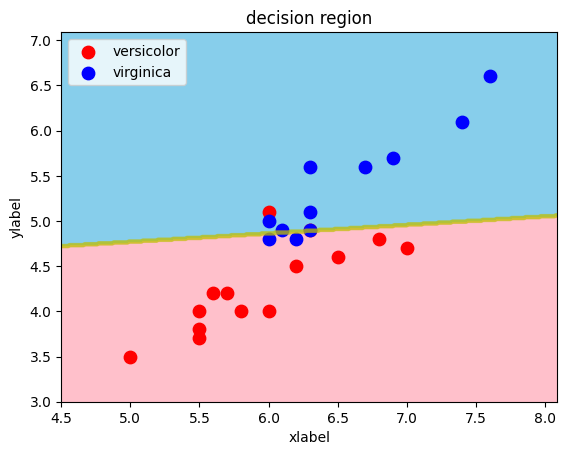

In [116]:
decision_region(X_test, y_test, log_reg_unscaled)

In [117]:
svm_unscaled = make_pipeline(StandardScaler(), SVC(gamma="auto"))
svm_unscaled.fit(X_train, y_train)
y_pred_svm_unscaled = svm_unscaled.predict(X_test)
evaluation(y_test, y_pred_svm_unscaled)


Evaluation of the Model:
Accuracy:  0.840
Precision: 0.857
Recall:    0.857
F1 Score:  0.857
Confusion matrix:
 [[12  2]
 [ 2  9]]


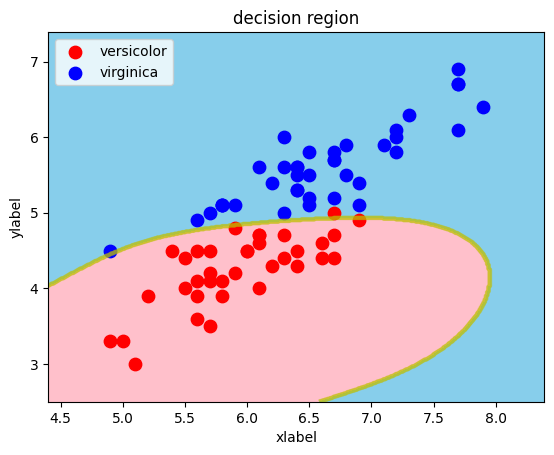

In [118]:
decision_region(X_train, y_train, svm_unscaled)

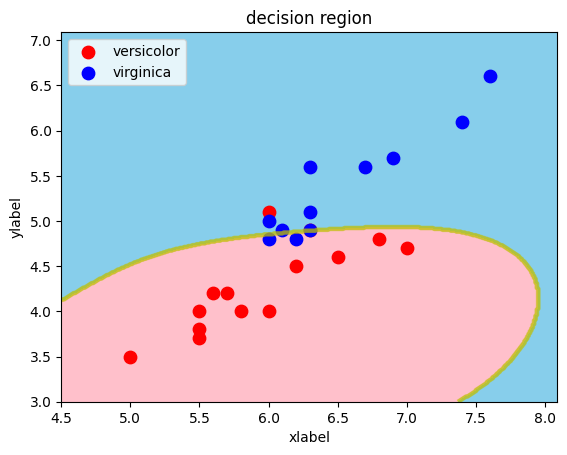

In [119]:
decision_region(X_test, y_test, svm_unscaled)

In [131]:
decision_tree_unscaled = DecisionTreeClassifier()
decision_tree_unscaled.fit(X_train, y_train)
y_pred_tree_unscaled = decision_tree_unscaled.predict(X_test)
evaluation(y_test, y_pred_tree_unscaled)


Evaluation of the Model:
Accuracy:  0.840
Precision: 0.812
Recall:    0.929
F1 Score:  0.867
Confusion matrix:
 [[13  1]
 [ 3  8]]


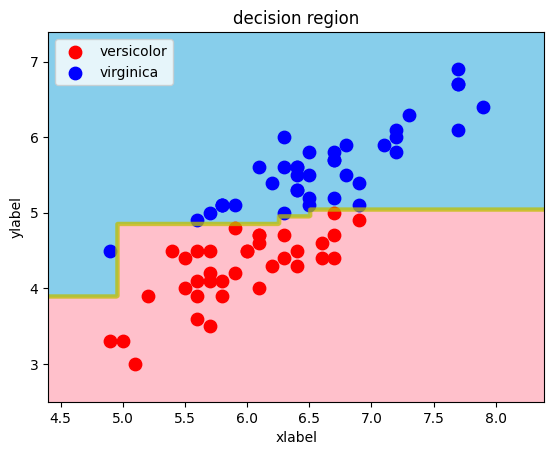

In [132]:
decision_region(X_train, y_train, decision_tree_unscaled)

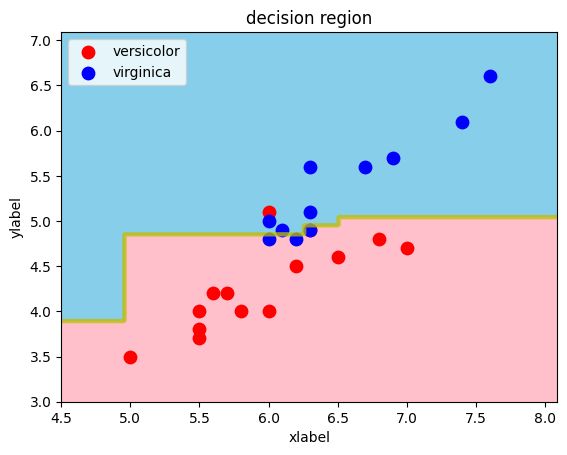

In [133]:
decision_region(X_test, y_test, decision_tree_unscaled)

In [137]:
random_forest_unscaled = RandomForestClassifier()
random_forest_unscaled.fit(X_train, y_train)
y_pred_rforest_unscaled = random_forest_unscaled.predict(X_test)
evaluation(y_test, y_pred_rforest_unscaled)


Evaluation of the Model:
Accuracy:  0.840
Precision: 0.812
Recall:    0.929
F1 Score:  0.867
Confusion matrix:
 [[13  1]
 [ 3  8]]


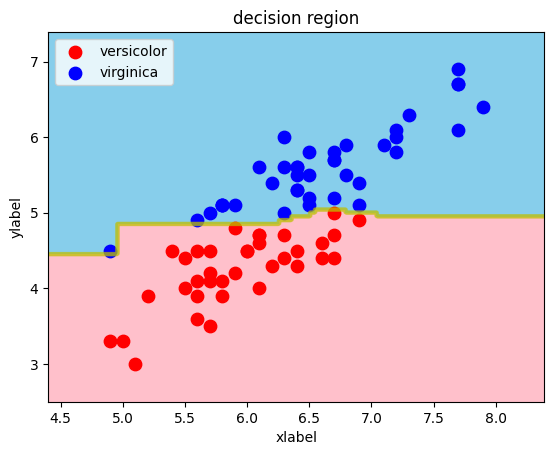

In [138]:
decision_region(X_train, y_train, random_forest_unscaled)

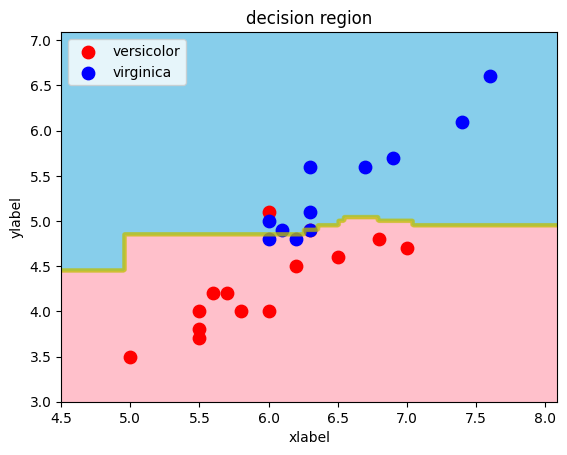

In [140]:
decision_region(X_test, y_test, random_forest_unscaled)

**What is Standardization in machine learning?**   
*  Standardization is an important technique taht is mostly performed as a pre-processing step before many Machine Learning models, to standardize the range of features of an input data set.
*  Standardization is a scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute become zero and the resultant distribution has a unit standard deviation.

## Problem 10: (Advanced Assignment) Highly accurate method using all objetive variables

In [201]:
X_3 = pd.DataFrame(data=load_iris().data, columns=["sepal_length","sepal_width","petal_length","petal_width"])
y_3 = pd.DataFrame(load_iris().target, columns=[("Species")])
df_3 = pd.concat([X_3, y_3], axis=1)
df_3 = df_3[['sepal_length', 'petal_length', 'Species']]
df_3

,sepal_length,petal_length,Species
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0
...,...,...,...
145,6.7,5.2,2
146,6.3,5.0,2
147,6.5,5.2,2
148,6.2,5.4,2


In [202]:
X_3 = df_3.loc[:,"sepal_length": "petal_length"].values
y_3 = df_3.loc[:, "Species"].values

X_train3, X_test3, y_train3, y_test3 = train_test_split(X_3, y_3, train_size=0.75, test_size=0.25)

print(X_train3.shape, X_test3.shape, y_train3.shape, y_test3.shape)

(112, 2) (38, 2) (112,) (38,)


In [203]:
scaler3 = StandardScaler()
scaler3.fit(X_train3)
X_train_scaled3 = scaler3.transform(X_train3)
X_test_scaled3 = scaler3.transform(X_test3)

knn5_3 = KNeighborsClassifier()
knn5_3.fit(X_train_scaled3, y_train3)
pred_knn5_3 = knn5_3.predict(X_test_scaled3)

In [204]:
def decision_region_3(
    X,
    y,
    model,
    step=0.01,
    title="decision region",
    xlabel="xlabel",
    ylabel="ylabel",
    target_names=None,  # mejor usar None como valor por defecto
):
    # setting
    if target_names is None:
        target_names = list(set(y))  # o pon nombres por defecto

    n_class = len(target_names)

    if n_class == 2:
        scatter_color = ["red", "blue"]
        contourf_color = ["pink", "skyblue"]
    elif n_class == 3:
        scatter_color = ["green", "red", "blue"]
        contourf_color = ["lightgreen", "pink", "skyblue"]
    # pred
    mesh_f0, mesh_f1 = np.meshgrid(
        np.arange(np.min(X[:, 0]) - 0.5, np.max(X[:, 0]) + 0.5, step),
        np.arange(np.min(X[:, 1]) - 0.5, np.max(X[:, 1]) + 0.5, step),
    )
    mesh = np.c_[np.ravel(mesh_f0), np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(
        mesh_f0, mesh_f1, y_pred, n_class - 1, cmap=ListedColormap(contourf_color)
    )
    plt.contour(
        mesh_f0, mesh_f1, y_pred, n_class - 1, colors="y", linewidths=3, alpha=0.5
    )
    for i, target in enumerate(set(y)):
        plt.scatter(
            X[y == target][:, 0],
            X[y == target][:, 1],
            s=80,
            color=scatter_color[i],
            label=target_names[i],
            marker="o",
        )
    patches = [
        mpatches.Patch(color=scatter_color[i], label=target_names[i])
        for i in range(n_class)
    ]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

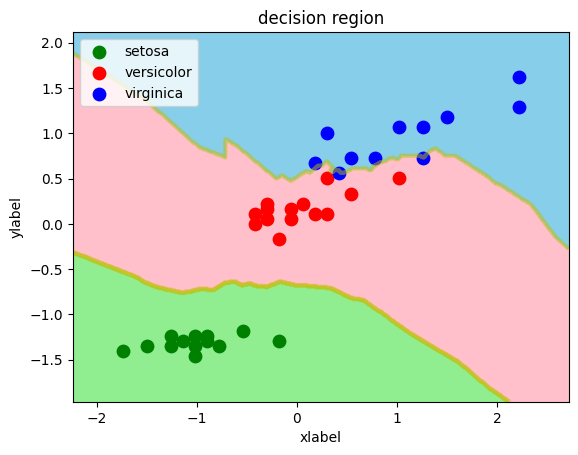

In [205]:
decision_region_3(X_test_scaled3, y_test3, knn5_3, target_names=["setosa", "versicolor", "virginica"])

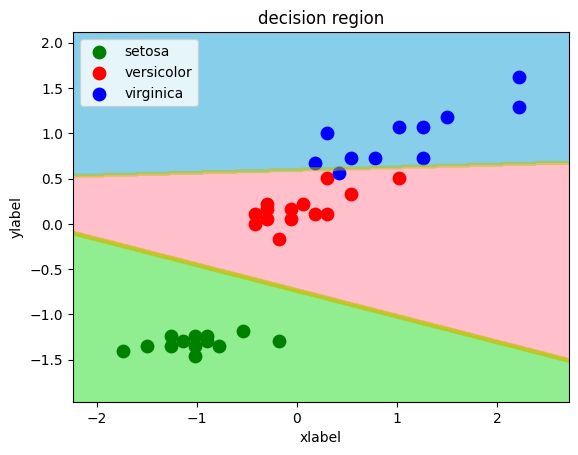

In [206]:
logregresion3 = LogisticRegression()
logregresion3.fit(X_train_scaled3, y_train3)
pred_log3 = logregresion3.predict(X_test_scaled3)
decision_region_3(X_test_scaled3, y_test3, logregresion3, target_names=["setosa", "versicolor", "virginica"])

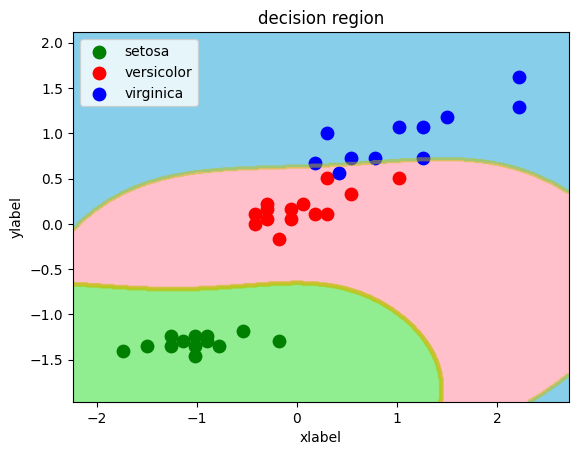

In [207]:
svm_3 = make_pipeline(StandardScaler(), SVC(gamma="auto"))
svm_3.fit(X_train_scaled3, y_train3)
pred_svm3 = svm_3.predict(X_test_scaled3)
decision_region_3(X_test_scaled3, y_test3, svm_3, target_names=["setosa", "versicolor", "virginica"])

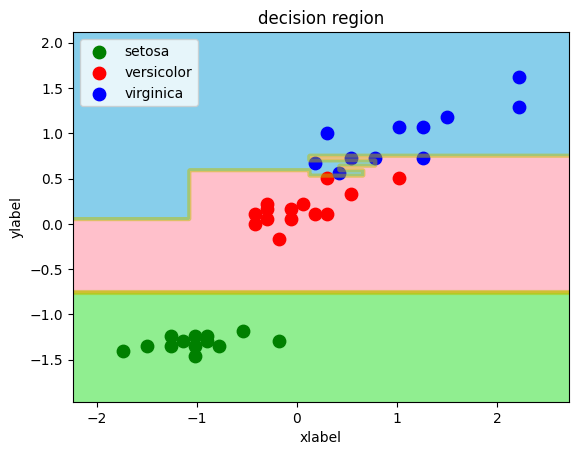

In [208]:
decision_tree3 = DecisionTreeClassifier()
decision_tree3.fit(X_train_scaled3, y_train3)
pred_tree3 = decision_tree3.predict(X_test_scaled3)
decision_region_3(X_test_scaled3, y_test3, decision_tree3, target_names=["setosa", "versicolor", "virginica"])

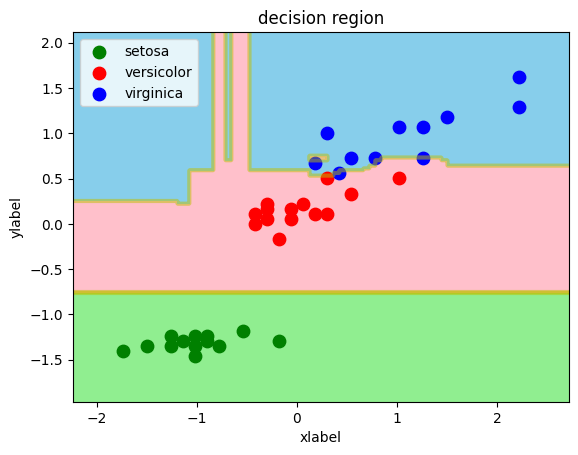

In [209]:
random_forest3 = RandomForestClassifier()
random_forest3.fit(X_train_scaled3, y_train3)
pred_rforest3 = random_forest3.predict(X_test_scaled3)
decision_region_3(X_test_scaled3, y_test3, random_forest3, target_names=["setosa", "versicolor", "virginica"])